# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

In [1]:
# importacion de librerias
import numpy as np
import pandas as pd

## Parte 0: Carga del Corpus

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

Limpieza del corpus

In [3]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    # 1. A minúsculas
    text = text.lower()
    
    # 2. Eliminar URLs y correos
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'\S+@\S+', ' ', text)
    
    # 3. Eliminar caracteres no alfabéticos y convertir a espacios
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # 4. Reemplazar múltiples espacios por uno solo
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 5. Tokenizar
    tokens = text.split()
    
    # 6. Eliminar palabras muy cortas y stopwords
    tokens = [t for t in tokens if len(t) > 2 and t not in ENGLISH_STOP_WORDS]
    
    # 7. Unir de nuevo (opcional, para usar con vectorizers)
    return ' '.join(tokens)

# Limpieza del corpus completo (puedes probar primero con los primeros 5 documentos)
cleaned_docs = [clean_text(doc) for doc in newsgroupsdocs]

# Ejemplo de resultado
#for i, c in enumerate(cleaned_docs):
#    print(f"Documento {i} limpio:\n{c[:400]}\n{'-'*80}\n")


In [4]:
# revision de correcta limpieza
print(newsgroupsdocs[0])
print(cleaned_docs[0])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually bit puzzled bit relieved going end non pittsburghers relief bit praise pens man killing devils worse thought jagr just showed better regular season stats lot fun watch playoffs bowman let jagr lo

In [5]:
# cantidad de documentos limpiados
len(cleaned_docs)

18846

In [6]:
# usará corpus, una muestra de los primeros 100 elementos
corpus = cleaned_docs[:100]
len(corpus)

100

In [7]:
vocab = sorted(list(set(" ".join(corpus).split())))
# vocab = sorted(set(" ".join(corpus).split()))
len(vocab)

3478

In [8]:
print("N docs (corpus):", len(corpus))
print("Vocab size:", len(vocab))

N docs (corpus): 100
Vocab size: 3478


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

### Cálculo de TF

In [9]:
from collections import Counter

def get_tf_vector(doc, vocab):
    tokens = doc.split()
    # Counter se usa temporalmente para acceder fácilmente a los conteos.
    counts = Counter(tokens)
    # busca t en el diccionario counts. Si no lo encuentra, devuelve 0
    return np.array([counts.get(t, 0) for t in vocab], dtype=float)

# construir matriz (n_docs x n_terms)
tf_matrix = np.array([get_tf_vector(d, vocab) for d in corpus])
tf_df = pd.DataFrame(tf_matrix, columns=vocab)
# Mostrar tamaño y primeras filas/columnas
print("TF matrix shape:", tf_df.shape)
#display(tf_df.head())          # muestra primeras 5 filas (documentos) y todas las columnas (puedes desplazarte)
display(tf_df.head(20))        # por defecto muestra 5 filas, cambié a 20


TF matrix shape: (100, 3478)


,aaa,abandoned,abc,abiding,ability,able,absent,accelerated,accepted,access,...,young,youth,yvan,yzerman,zalik,zarshad,zeno,zero,zezel,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
corpus[3]

'think scsi card doing dma transfers disks scsi card dma transfers containing data scsi devices attached wants important feature scsi ability detach device frees scsi bus devices typically used multi tasking start transfers devices device seeking data bus free commands data transfers devices ready transfer data aquire bus send data ide bus start transfer bus busy disk seeked data transfered typically second lock processes wanting bus irrespective transfer time'

### Cálculo de DF

In [11]:
# transforma los elementos > 0 a true (i.e. 1).
df_values = (tf_matrix > 0).sum(axis=0)   # vector de longitud vocab
df_df = pd.DataFrame({'term': vocab, 'DF': df_values})
# ordena los terminos de mayor a menor
df_df_sorted = df_df.sort_values('DF', ascending=False).reset_index(drop=True)
print("DF frame shape:", df_df_sorted.shape)
# en la lista ya ordenada:
display(df_df_sorted.head(10))   # muestra los 10 docs más comunes
display(df_df_sorted.tail(10))   # muestra los 10 docs más raros


DF frame shape: (3478, 2)


,term,DF
0,don,23
1,know,21
2,time,20
3,think,20
4,just,17
5,like,16
6,way,15
7,use,15
8,make,14
9,does,14


,term,DF
3468,gvw,1
3469,gyroscopes,1
3470,habit,1
3471,hah,1
3472,hallmark,1
3473,handle,1
3474,handles,1
3475,handling,1
3476,hands,1
3477,zur,1


### Cálculo de IDF

In [12]:
N = len(corpus)
# evitar DF=0 (no debería haber), pero por seguridad:
df_safe = df_values.copy()
df_safe[df_safe == 0] = 1

# IDF sin suavizar
idf_no_smooth = np.log(N / df_safe)

# IDF con suavizado (sklearn-style)
idf_smooth = np.log((N + 1) / (df_safe + 1)) + 1

idf_df = pd.DataFrame({
    'term': vocab,
    'DF': df_values,
    'IDF_no_smooth': idf_no_smooth,
    'IDF_smooth': idf_smooth
}).sort_values('IDF_no_smooth', ascending=False).reset_index(drop=True)

display(idf_df.head(30))   # términos con mayor IDF (términos raros)
# Calcular TF-IDF manual (usando IDF_no_smooth por ahora)
tfidf_manual = tf_matrix * idf_smooth  # broadcasting (n_docs x n_terms) * (n_terms,)
tfidf_df = pd.DataFrame(tfidf_manual, columns=vocab)
print("Cálculo de TF-IDF, con IDF suavizado (sumando +1 en las ecuaciones de logaritmos).")
display(tfidf_df.iloc[:5,:20])   # ver primeras 5 filas y primeras 20 columnas


,term,DF,IDF_no_smooth,IDF_smooth
0,aaa,1,4.60517,4.921973
1,pants,1,4.60517,4.921973
2,ozal,1,4.60517,4.921973
3,pabon,1,4.60517,4.921973
4,padover,1,4.60517,4.921973
5,pads,1,4.60517,4.921973
6,pages,1,4.60517,4.921973
7,paiment,1,4.60517,4.921973
8,painful,1,4.60517,4.921973
9,pamphlets,1,4.60517,4.921973


Cálculo de TF-IDF, con IDF suavizado (sumando +1 en las ecuaciones de logaritmos).


,aaa,abandoned,abc,abiding,ability,able,absent,accelerated,accepted,access,accident,according,accurate,accused,acetone,achieved,achkar,acknowledges,aclu,acquiring
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.66921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cálculo de TF-IDF con sklearn

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer con suavizado (sklearn default: smooth_idf=True). No normalizamos (norm=None) para ser comparable.
vec_sklearn = TfidfVectorizer(vocabulary=vocab, use_idf=True, smooth_idf=True, norm=None, token_pattern=r"(?u)\b\w+\b")
X_sklearn = vec_sklearn.fit_transform(corpus)   # shape (N, V)
idf_sklearn = vec_sklearn.idf_    # len = V

# DataFrame comparativo IDF
comp_idf_df = pd.DataFrame({
    'term': vec_sklearn.get_feature_names_out(),
    'IDF_sklearn': idf_sklearn,
    'IDF_manual_smooth': idf_smooth
})
# mostrar primeras filas y comparar
display(comp_idf_df.sort_values('IDF_sklearn', ascending=False).head(30))
# convertir matriz sklearn a DataFrame (con cuidado de memoria)
tfidf_sklearn_df = pd.DataFrame(X_sklearn.toarray(), columns=vec_sklearn.get_feature_names_out())
display(tfidf_sklearn_df.iloc[:5,:20])


,term,IDF_sklearn,IDF_manual_smooth
0,aaa,4.921973,4.921973
2164,pants,4.921973,4.921973
2151,ozal,4.921973,4.921973
2152,pabon,4.921973,4.921973
2154,padover,4.921973,4.921973
2155,pads,4.921973,4.921973
2156,pages,4.921973,4.921973
2158,paiment,4.921973,4.921973
2160,painful,4.921973,4.921973
2162,pamphlets,4.921973,4.921973


,aaa,abandoned,abc,abiding,ability,able,absent,accelerated,accepted,access,accident,according,accurate,accused,acetone,achieved,achkar,acknowledges,aclu,acquiring
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.66921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ejemplo, término ability del doc3

In [14]:
# análisis de ability en el doc 3
term = 'ability'
if term in vocab:
    idx = vocab.index(term)
    doc_idx = 3
    tf = tf_matrix[doc_idx, idx]
    df = df_values[idx]
    print("TF (doc,term):", tf)
    print("DF (term):", df)
    print("N:", N)
    print("IDF no smooth:", idf_no_smooth[idx])
    print("IDF smooth  :", idf_smooth[idx])
    print("TF-IDF manual (no smooth):", tf * idf_no_smooth[idx])
    print("TF-IDF sklearn (smooth):   ", tfidf_sklearn_df.iloc[doc_idx, idx])
else:
    print("Term not in vocab")


TF (doc,term): 1.0
DF (term): 6
N: 100
IDF no smooth: 2.8134107167600364
IDF smooth  : 3.6692103677859462
TF-IDF manual (no smooth): 2.8134107167600364
TF-IDF sklearn (smooth):    3.6692103677859462


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

### Construcción del vector consulta

In [155]:
# se crea la consulta
# query = "pens hockey playoff abandoned"
# query = "pens hockey playoff"
# query = 'question comes frequently faq aaa'
query = 'issues with video cards, vesa local bus, and graphics performance' #nueva query, para tener mejores resultados
# query = 'years ago victim squirted fair old model'
query_clean = clean_text(query)
print("Query limpia:", query_clean)

# Calcular TF de la consulta
tf_query = get_tf_vector(query_clean, vocab)
print("TF (query) - número de términos no nulos:", int(np.sum(tf_query > 0)))

print("\nRepresentación en Texto:")

# Mostrar términos no nulos con su TF
nonzero_idx = np.where(tf_query > 0)[0]
print("\nTérminos y TF en la query:")
for i in nonzero_idx:
    print(f"  {vocab[i]} : TF = {int(tf_query[i])}")

# Calcular TF-IDF de la consulta
tfidf_query = tf_query * idf_smooth

# Mostrar términos con su TF-IDF
print("\nTérminos y TF-IDF (query):")
for i in nonzero_idx:
    print(f"  {vocab[i]} : TF-IDF = {tfidf_query[i]:.6f}")


# construir matriz (1 x n_terms)
tf_matrix_query = np.array([tf_query])
tf_df_query = pd.DataFrame(tf_matrix_query, columns=vocab)

print("\nRepresentación en DataFrames:")

# Mostrar tamaño y primeras columnas
print("\nTF matrix (query) shape:", tf_df_query.shape)
display(tf_df_query.iloc[:, :20])  # muestra las primeras 20 columnas
# Filtrar solo las columnas con TF > 0
print("\nTF matrix (query): solo elementos no nulos")
nonzero_cols = tf_df_query.loc[:, (tf_df_query != 0).any(axis=0)]
display(nonzero_cols)


# --- (Opcional) matriz TF-IDF también ---
tfidf_df_query = pd.DataFrame([tfidf_query], columns=vocab)
print("\nTF-IDF matrix (query) shape:", tfidf_df_query.shape)
display(tfidf_df_query.iloc[:, :20])
# Filtrar solo las columnas con TF-IDF > 0
print("\nTF-IDF matrix (query): solo elementos no nulos")
nonzero_cols_tfidf = tfidf_df_query.loc[:, (tfidf_df_query != 0).any(axis=0)]
display(nonzero_cols_tfidf)


Query limpia: issues video cards vesa local bus graphics performance
TF (query) - número de términos no nulos: 8

Representación en Texto:

Términos y TF en la query:
  bus : TF = 1
  cards : TF = 1
  graphics : TF = 1
  issues : TF = 1
  local : TF = 1
  performance : TF = 1
  vesa : TF = 1
  video : TF = 1

Términos y TF-IDF (query):
  bus : TF-IDF = 4.005683
  cards : TF-IDF = 4.516508
  graphics : TF-IDF = 4.516508
  issues : TF-IDF = 4.921973
  local : TF-IDF = 3.669210
  performance : TF-IDF = 4.005683
  vesa : TF-IDF = 4.228826
  video : TF-IDF = 4.516508

Representación en DataFrames:

TF matrix (query) shape: (1, 3478)


,aaa,abandoned,abc,abiding,ability,able,absent,accelerated,accepted,access,accident,according,accurate,accused,acetone,achieved,achkar,acknowledges,aclu,acquiring
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



TF matrix (query): solo elementos no nulos


,bus,cards,graphics,issues,local,performance,vesa,video
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



TF-IDF matrix (query) shape: (1, 3478)


,aaa,abandoned,abc,abiding,ability,able,absent,accelerated,accepted,access,accident,according,accurate,accused,acetone,achieved,achkar,acknowledges,aclu,acquiring
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



TF-IDF matrix (query): solo elementos no nulos


,bus,cards,graphics,issues,local,performance,vesa,video
0,4.005683,4.516508,4.516508,4.921973,3.66921,4.005683,4.228826,4.516508


### Similitud Coseno

In [156]:
# Normalizar vectores TF-IDF
# produce un vector de longitud igual al número de documentos en el corpus
# Sim(q, d1), Sim(q, d2), ..., Sim(q, dn); n = totDocumentos
def cosine_similarity_manual(query_vec, docs_matrix):
    similarities = []
    norm_q = np.linalg.norm(query_vec)
    
    for d in docs_matrix:
        norm_d = np.linalg.norm(d)
        if norm_d == 0 or norm_q == 0:
            similarities.append(0.0)
        else:
            sim = np.dot(query_vec, d) / (norm_q * norm_d)
            similarities.append(sim)
    return np.array(similarities)

# Calcular similitudes
similarities_manual = cosine_similarity_manual(tfidf_query, tfidf_manual)

# Crear DataFrame con una columna
similarities_manual_df = pd.DataFrame({
    'doc_id': np.arange(len(similarities_manual)),
    'similarity': similarities_manual
})

# Mostrar ordenado por similitud descendente
similarities_manual_df_sorted = similarities_manual_df.sort_values('similarity', ascending=False).reset_index(drop=True)

print("Máxima similitud:", np.max(similarities_manual))
print("Cantidad de documentos con similitud > 0:", np.sum(similarities_manual > 0))

display(similarities_manual_df_sorted.head(10))

Máxima similitud: 0.44009338690456606
Cantidad de documentos con similitud > 0: 15


,doc_id,similarity
0,1,0.440093
1,28,0.208301
2,3,0.131416
3,27,0.126958
4,22,0.104450
5,33,0.097448
6,57,0.083171
7,95,0.058627
8,51,0.037702
9,45,0.036610


### Ranking de documentos
Ordenados por Relevancia. El más relevante es aquel que tiene una similitud mayor entre query y documento, tomando como referencia la Similitud Coseno.

In [157]:
# Crear tabla de resultados
ranking_manual = pd.DataFrame({
    'doc_id': range(len(corpus)),
    'similarity': similarities_manual,
    'text_preview': [doc[:200].replace('\n', ' ') + '...' for doc in corpus]
})

# Ordenar por mayor similitud
ranking_manual = ranking_manual.sort_values('similarity', ascending=False).reset_index(drop=True)

# Mostrar los 3 primeros resultados
ranking_manual.head(3)

,doc_id,similarity,text_preview
0,1,0.440093,brother market high performance video card sup...
1,28,0.208301,cad setup sale plb local bus motherboard use s...
2,3,0.131416,think scsi card doing dma transfers disks scsi...


In [158]:
top_doc_id = ranking_manual.iloc[0]['doc_id']
print(f"Documento más relevante (ID={top_doc_id}):\n")
print(corpus[top_doc_id])


Documento más relevante (ID=1):

brother market high performance video card supports vesa local bus ram does suggestions ideas diamond stealth pro local bus orchid farenheit ati graphics ultra pro high performance vlb card post email thank matt


## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [19]:
!pip install rank_bm25

In [159]:
from rank_bm25 import BM25Okapi
# Tokenizar los documentos (BM25 trabaja con listas de palabras)
tokenized_corpus = [doc.split() for doc in corpus]
# Crear el modelo BM25
bm25 = BM25Okapi(tokenized_corpus)

# Definir la consulta
query_clean = clean_text(query)
tokenized_query = query_clean.split()

# Calcular los scores BM25
bm25_scores_lib = bm25.get_scores(tokenized_query)

# Crear ranking
ranking_bm25_lib = pd.DataFrame({
    "doc_id": np.arange(len(corpus)),
    "bm25_score": bm25_scores_lib
}).sort_values("bm25_score", ascending=False).reset_index(drop=True)

display(ranking_bm25_lib.head(10))

,doc_id,bm25_score
0,1,29.436869
1,28,14.949898
2,95,6.590028
3,22,6.294630
4,27,6.271494
5,3,6.181256
6,33,5.717777
7,57,5.444145
8,51,3.760321
9,45,3.597034


In [161]:
# similarities_manual

ranking_tfidf = pd.DataFrame({
    "doc_id": np.arange(len(corpus)),
    "tfidf_score": similarities_manual
}).sort_values("tfidf_score", ascending=False).reset_index(drop=True)

display(ranking_tfidf.head(10))


,doc_id,tfidf_score
0,1,0.440093
1,28,0.208301
2,3,0.131416
3,27,0.126958
4,22,0.104450
5,33,0.097448
6,57,0.083171
7,95,0.058627
8,51,0.037702
9,45,0.036610


### Comparación entre ambos rankings

In [162]:
comparison_lib = ranking_bm25_lib.merge(
    similarities_manual_df,
    on="doc_id",
    how="inner"
).sort_values("bm25_score", ascending=False)

display(comparison_lib.head(10))

,doc_id,bm25_score,similarity
0,1,29.436869,0.440093
1,28,14.949898,0.208301
2,95,6.590028,0.058627
3,22,6.294630,0.104450
4,27,6.271494,0.126958
5,3,6.181256,0.131416
6,33,5.717777,0.097448
7,57,5.444145,0.083171
8,51,3.760321,0.037702
9,45,3.597034,0.036610


In [163]:
# -------------------------------
# Crear ranking explícito BM25
# -------------------------------
ranking_bm25_lib = ranking_bm25_lib.reset_index(drop=True)
ranking_bm25_lib["bm25_rank"] = ranking_bm25_lib.index + 1

# -------------------------------
# Crear ranking explícito TF-IDF
# -------------------------------
# ranking_tfidf_sklearn = ranking_tfidf_sklearn.reset_index(drop=True)
# ranking_tfidf_sklearn["tfidf_rank"] = ranking_tfidf_sklearn.index + 1

# -------------------------------
# Unir por posición de ranking
# -------------------------------
comparison_by_rank = pd.DataFrame({
    "rank": ranking_bm25_lib["bm25_rank"],
    "bm25_doc_id": ranking_bm25_lib["doc_id"],
    "bm25_score": ranking_bm25_lib["bm25_score"],
    "tfidf_doc_id": ranking_manual["doc_id"],
    "tfidf_score": ranking_manual["similarity"],
})

display(comparison_by_rank.head(10))

,rank,bm25_doc_id,bm25_score,tfidf_doc_id,tfidf_score
0,1,1,29.436869,1,0.440093
1,2,28,14.949898,28,0.208301
2,3,95,6.590028,3,0.131416
3,4,22,6.294630,27,0.126958
4,5,27,6.271494,22,0.104450
5,6,3,6.181256,33,0.097448
6,7,33,5.717777,57,0.083171
7,8,57,5.444145,95,0.058627
8,9,51,3.760321,51,0.037702
9,10,45,3.597034,45,0.036610


Conclusión: En la tabla anterior se observan los resultados de comparar el ranking obtenido con BM25 y con TF-IDF. Si bien el ranking es ligeramente distinto, ambos coinciden en el documento más similar.

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

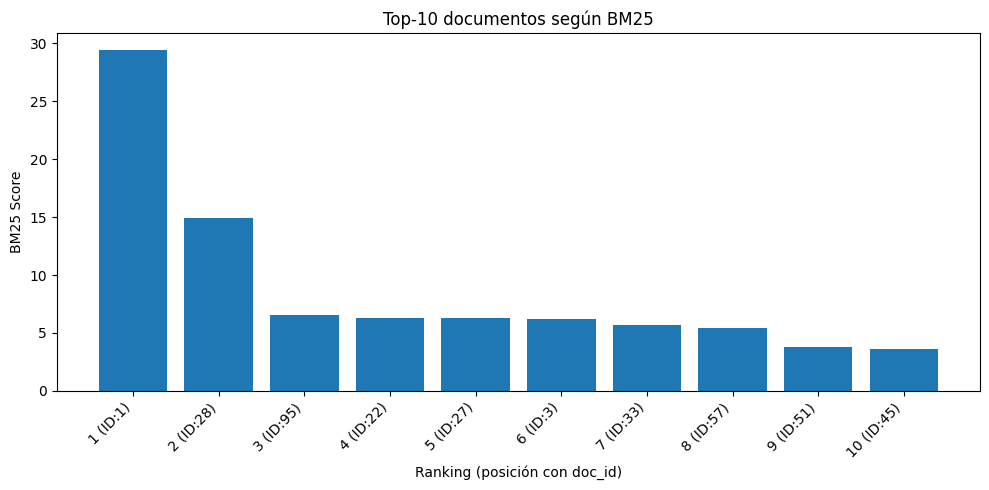

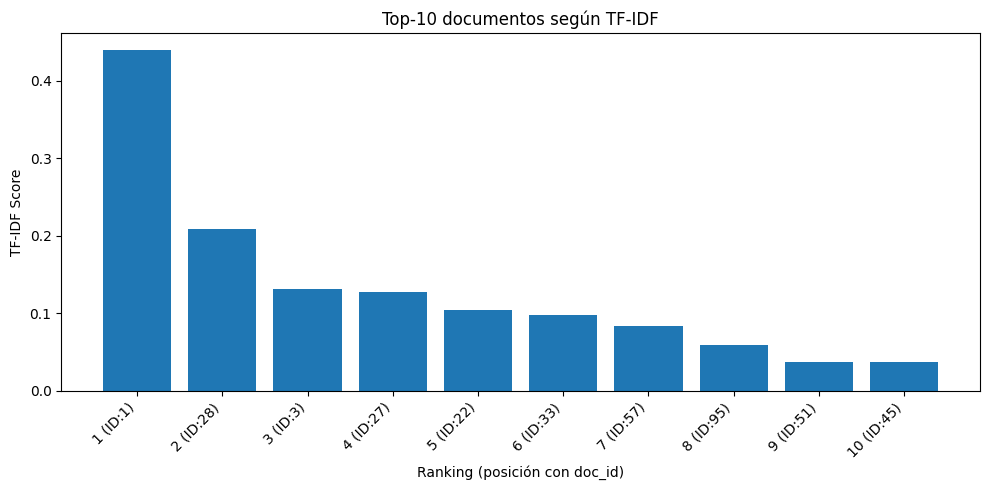

In [164]:
import matplotlib.pyplot as plt

# --- Seleccionar TOP-10 ---
top_k = 10

top_bm25 = ranking_bm25_lib.head(top_k)
top_tfidf = ranking_manual.head(top_k)

# --- Gráfico BM25 ---
plt.figure(figsize=(10, 5))
plt.bar(
    x=[f"{i+1} (ID:{doc})" for i, doc in enumerate(top_bm25["doc_id"])],
    height=top_bm25["bm25_score"]
)
plt.title("Top-10 documentos según BM25")
plt.xlabel("Ranking (posición con doc_id)")
plt.ylabel("BM25 Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Gráfico TF-IDF ---
plt.figure(figsize=(10, 5))
plt.bar(
    x=[f"{i+1} (ID:{doc})" for i, doc in enumerate(top_tfidf["doc_id"])],
    height=top_tfidf["similarity"]
)
plt.title("Top-10 documentos según TF-IDF")
plt.xlabel("Ranking (posición con doc_id)")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Conclusión de los gráficos de barras
Tanto TF-IDF, como BM25 coinciden en que el documento más relevante es el mismo. Sin embargo, al analizar el top10 se nota que si bien se mantienen los mismos elementos, el orden cambia. Esto se debe a la manera de calcular la similitud: TF-IDF utiliza similitud coseno, mientras que BM25 emplea una función de puntuación basada en la frecuencia del término ajustada por la longitud del documento y parámetros de saturación.

## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

Se usa la consulta `query`, utilizada en todo el proyecto. Además, se define los documentos relevantes en base a su contenido y su relación con la query.
- Documento 1: habla sobre hardware performance video cards.
- Documento 3: habla sobre scsi, dma, bus transfers.
- Documento 4: habla sobre drivers, compatibility, hardware failures.
- Documento 16: habla sobre hardware failures, mechanical/electrical malfunction, system breakdown.

In [174]:
relevant_docs={1, 3, 4, 16}
print("Query: ",query, "\n")
print("Relevant documents:")
for i in relevant_docs:
    print(f"{i}: {corpus[i]}\n")

Query:  issues with video cards, vesa local bus, and graphics performance 

Relevant documents:
16: thanks replied appeal info drive rpm information modify use bbc computer change speed rpm tried change components rec play section allow lower data rate kbit kbit designed change recording current allow low data rate rev speed hopefully sort bad quid normally quid upwards drive jvc mdp series drive

1: brother market high performance video card supports vesa local bus ram does suggestions ideas diamond stealth pro local bus orchid farenheit ati graphics ultra pro high performance vlb card post email thank matt

3: think scsi card doing dma transfers disks scsi card dma transfers containing data scsi devices attached wants important feature scsi ability detach device frees scsi bus devices typically used multi tasking start transfers devices device seeking data bus free commands data transfers devices ready transfer data aquire bus send data ide bus start transfer bus busy disk seeked dat

In [166]:
# -------------------------
# Precision@K
# -------------------------
def precision_at_k(ranked_list, relevant_set, k):
    retrieved_k = ranked_list[:k]
    hits = sum([1 for doc in retrieved_k if doc in relevant_set])
    return hits / k

# -------------------------
# Average Precision (AP)
# -------------------------
def average_precision(ranked_list, relevant_set):
    score = 0.0
    hits = 0
    
    for i, doc in enumerate(ranked_list):
        if doc in relevant_set:
            hits += 1
            score += hits / (i + 1)
    
    if len(relevant_set) == 0:
        return 0.0
    
    return score / len(relevant_set)


In [194]:
# ranked lists
ranked_tfidf = ranking_manual["doc_id"].tolist()
ranked_bm25  = ranking_bm25_lib["doc_id"].tolist()

# Precision@3
p3_tfidf = precision_at_k(ranked_tfidf, relevant_docs, k=3)
p3_bm25  = precision_at_k(ranked_bm25, relevant_docs, k=3)

# MAP
map_tfidf = average_precision(ranked_tfidf, relevant_docs)
map_bm25  = average_precision(ranked_bm25, relevant_docs)

print("--- Precision@3 ---")
print("TF-IDF:", p3_tfidf)
print("BM25 :", p3_bm25)

print("\n--- MAP ---")
print("TF-IDF:", map_tfidf)
print("BM25 :", map_bm25)


--- Precision@3 ---
TF-IDF: 0.6666666666666666
BM25 : 0.3333333333333333

--- MAP ---
TF-IDF: 0.44190476190476186
BM25 : 0.35857142857142854


### Conclusión
- Precision@3: TF-IDF posicionó mejor los documentos relevantes (escogidos subjetivamente por mí) en el ranking. 
- MAP: TF-IDF presenta un mejor *ordenamiento global* de los documentos relevantes.

Los resultados obtenidos demuestran que el ranking fue mejor elaborado por TF-IDF. Dicho resultado se debe a múltiples factores, entre ellos la subjetividad al momento de escoger los documentos relevantes, la query utiliza términos poco frecuentes y técnicos (terminos raros, lo que provoca que TF-IDF tenga una ponderación mayor) y la saturación que aplica BM25. BM25 no aumenta linealmente si una palabra se repite demasiadas veces (en comparación al TF de TF-IDF), a pesar de que un término se repita muchas veces, su contribución al bm25_score tendrá un máximo (saturación).